In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import combinations

In [2]:
data = pd.read_csv('./data.csv', sep=',', names=[
    'sex', 'length', 'diameter', 'height',
    'whole weight', 'shucked weight', 'viscera weight', 'shell weight',
    'rings'
])
data['sex'] = data['sex'].map({'M': 'Male', 'F': 'Female', 'I': 'Infant'});
num_cols = data.select_dtypes(include='number').columns

1.

In [3]:
pd.DataFrame({'count': data.value_counts('sex'), '%': (data.value_counts('sex', normalize=True) * 100).round(2)})

,count,%
sex,,
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


2.

In [4]:
data.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

,mean,std,min,25%,50%,75%,max
length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


3. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a bar chart of the counts of occurrences of each category for the qualitative variable in the dataset.

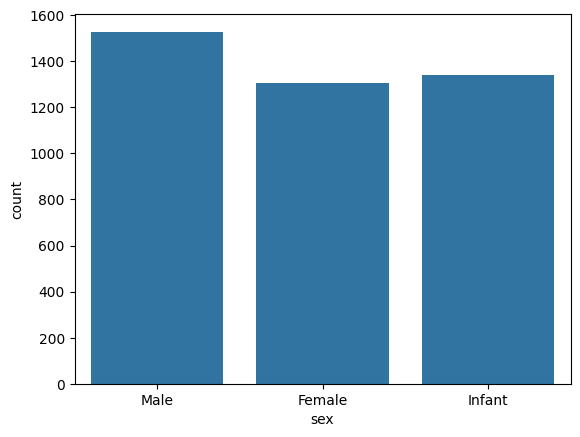

In [5]:
sns.countplot(data, x='sex');

4. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a histogram of each quantitative variable in the dataset. All histograms should be placed in a single figure spanning 4 rows and 2 columns.

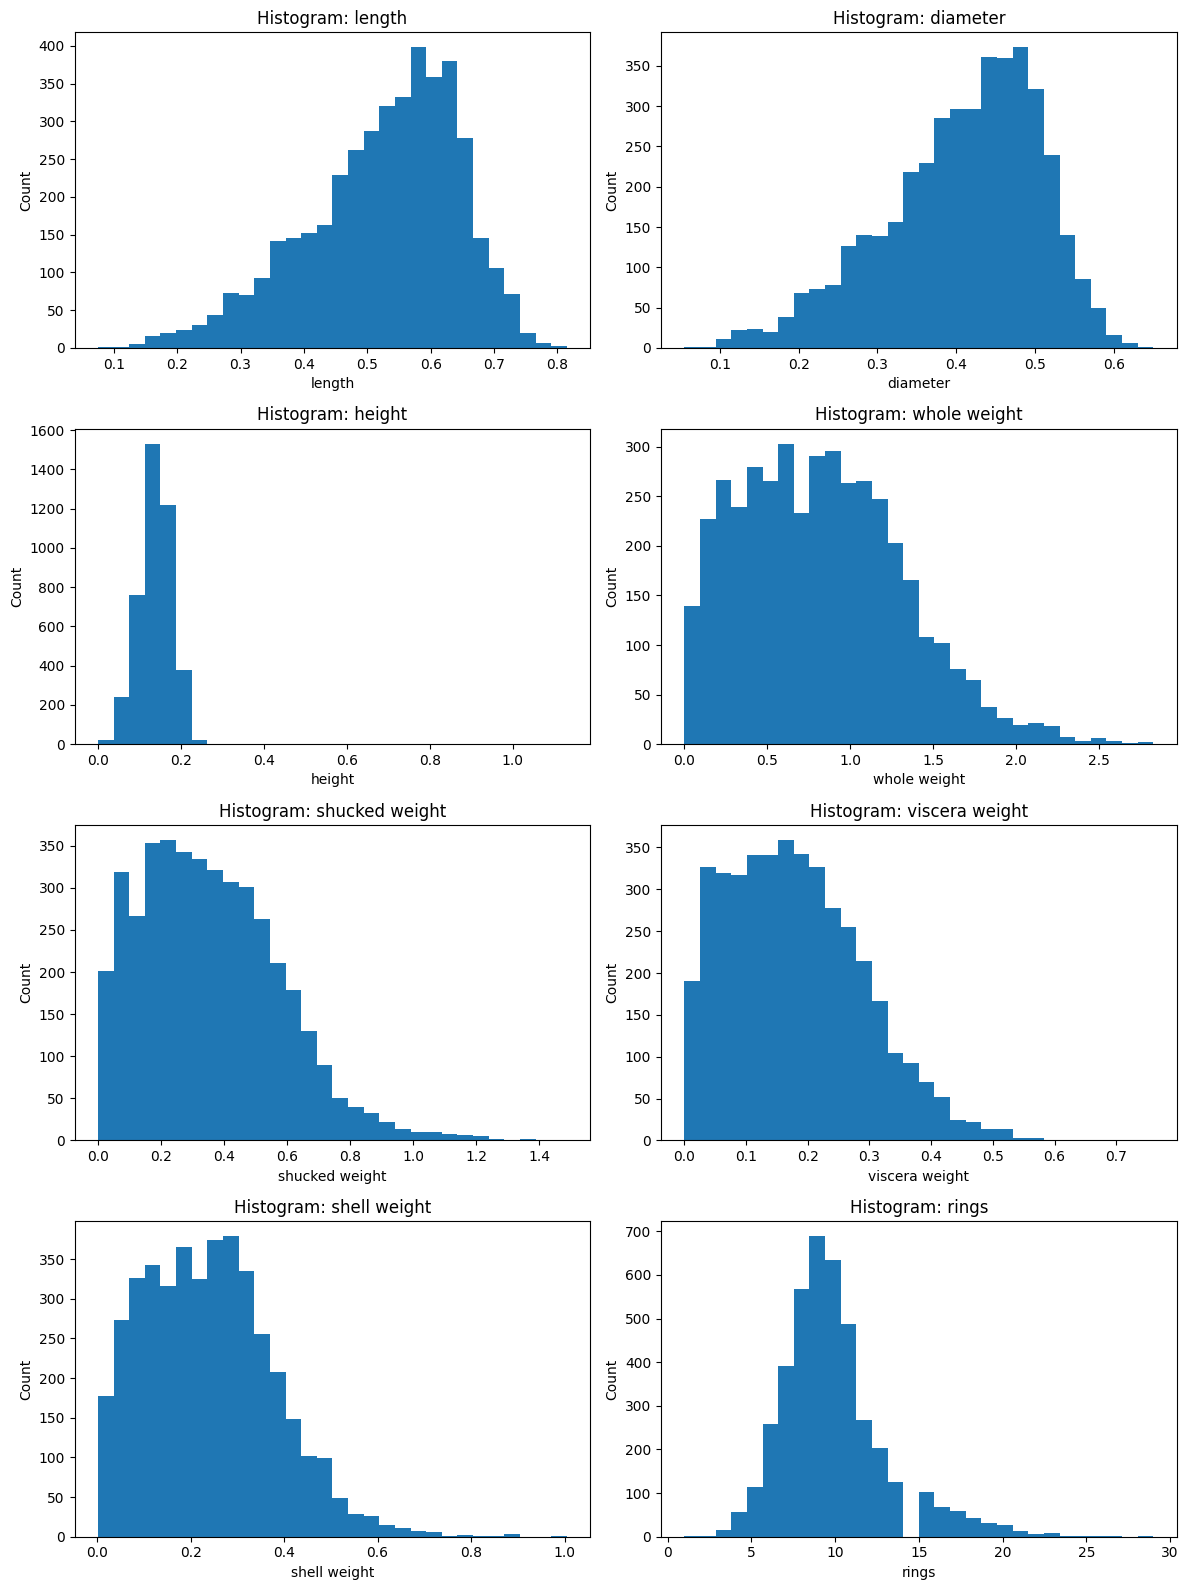

In [6]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    axes[i].hist(data[col].dropna(), bins=30)
    axes[i].set_title(f'Histogram: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


5. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a scatter plot for each pair of the quantitative variables in the     dataset. All scatter plots should be placed in a single figure spanning 14 rows and 2 columns.

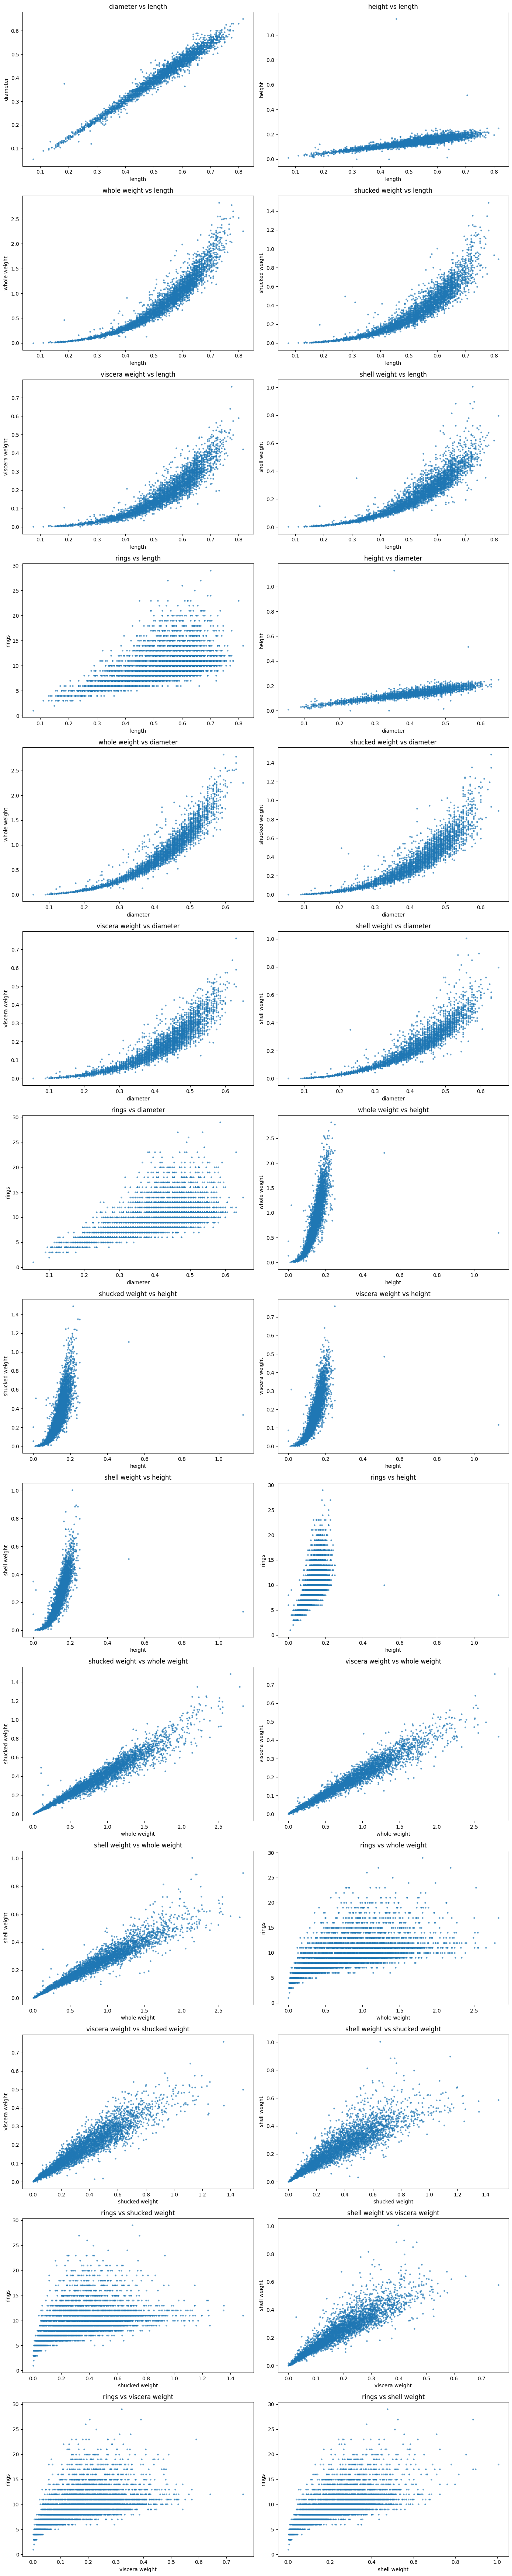

In [7]:
pairs = list(combinations(num_cols, 2))  
rows, cols = 14, 2

fig, axes = plt.subplots(rows, cols, figsize=(14, 70)) 
axes = axes.ravel()

for ax, (xcol, ycol) in zip(axes, pairs):
    ax.scatter(data[xcol], data[ycol], s=5, alpha=0.6)
    ax.set_xlabel(xcol)
    ax.set_ylabel(ycol)
    ax.set_title(f'{ycol} vs {xcol}')

for k in range(len(pairs), len(axes)):
    axes[k].set_visible(False)

plt.tight_layout()
plt.show()


6. Using the Pandas package, create a table representing a linear correlation matrix of all quantitative variables in the dataset.

In [8]:
corr_df = data[num_cols].corr(method='pearson')
corr_df


,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


7. Using the Seaborn package, create a heatmap representing a linear correlation matrix of all quantitative variables in the dataset.

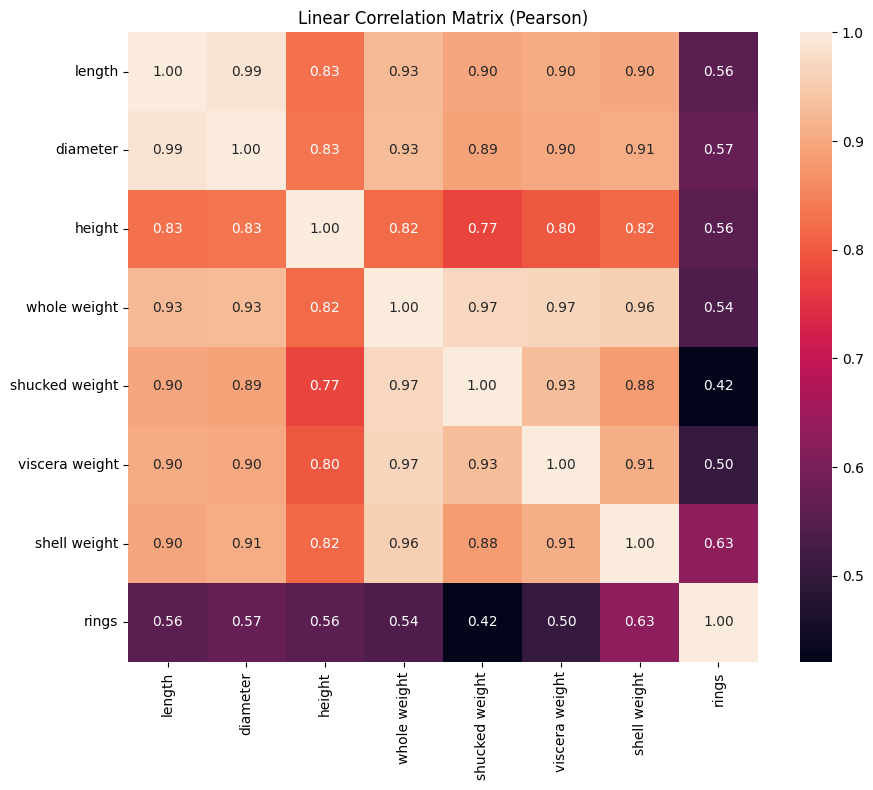

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, fmt=".2f", square=True, cbar=True)
plt.title('Linear Correlation Matrix (Pearson)')
plt.tight_layout()
plt.show()


8. Using the Seaborn package, create a linear regression plot with the two quantitative variables that are most strongly linearly            correlated (the variables may be hardcoded).

Most strongly linearly correlated pair: length and diameter = 0.987


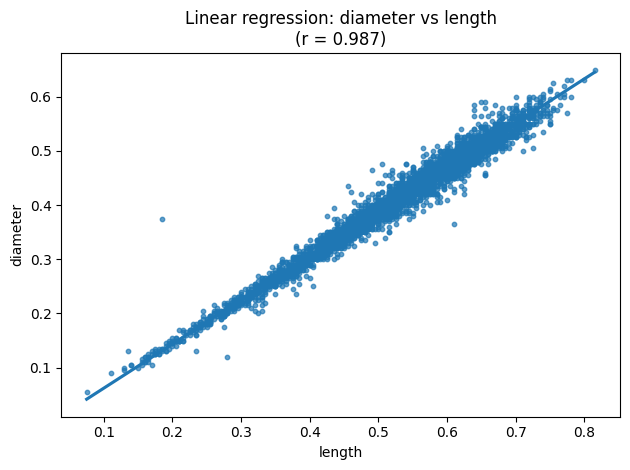

In [10]:
corr = data[num_cols].corr(method='pearson')
s = corr.abs().stack()
s = s[s.index.get_level_values(0) != s.index.get_level_values(1)]
if s.empty:
    raise ValueError("Not enought data")
xvar, yvar = s.idxmax()

print(f"Most strongly linearly correlated pair: {xvar} and {yvar} = {corr.loc[xvar, yvar]:.3f}")

sns.regplot(data=data, x=xvar, y=yvar, ci=95, scatter_kws={'s': 10, 'alpha': 0.7})
plt.title(f"Linear regression: {yvar} vs {xvar}\n(r = {corr.loc[xvar, yvar]:.3f})")
plt.tight_layout()
plt.show()


<h>Tasks for the maximum grade of 5</h>

2.

In [16]:
num_cols = num_col if 'num_col' in globals() else data.select_dtypes(include='number').columns

desc = (
    data.groupby('sex')[num_cols]
        .describe(percentiles=[.25, .5, .75])
)

desc = desc.loc[:, (slice(None), ['mean', 'std', 'min', '25%', '50%', '75%', 'max'])]

table = (
    desc
    .stack(level=0, future_stack=True)
    .rename_axis(index=['Sex', 'Feature'])
    .reorder_levels(['Feature', 'Sex'])
    .sort_index()
)

table_pretty = table.round(3).reset_index()

if set(['Female', 'Infant', 'Male']).issubset(set(table_pretty['Sex'].unique())):
    table_pretty['Sex'] = table_pretty['Sex'].astype(
        pd.CategoricalDtype(['Female', 'Infant', 'Male'], ordered=True)
    )
table_pretty = table_pretty.sort_values(['Feature', 'Sex']).reset_index(drop=True)

table_pretty.loc[table_pretty['Feature'].duplicated(), 'Feature'] = ''

display(table_pretty.style.hide(axis="index"))

Feature,Sex,mean,std,min,25%,50%,75%,max
diameter,Female,0.455000,0.071000,0.195000,0.410000,0.465000,0.505000,0.650000
,Infant,0.326000,0.088000,0.055000,0.270000,0.335000,0.390000,0.550000
,Male,0.439000,0.084000,0.110000,0.395000,0.455000,0.500000,0.630000
height,Female,0.158000,0.040000,0.015000,0.140000,0.160000,0.175000,1.130000
,Infant,0.108000,0.032000,0.000000,0.085000,0.110000,0.130000,0.220000
,Male,0.151000,0.035000,0.025000,0.130000,0.155000,0.175000,0.515000
length,Female,0.579000,0.086000,0.275000,0.525000,0.590000,0.640000,0.815000
,Infant,0.428000,0.109000,0.075000,0.360000,0.435000,0.510000,0.725000
,Male,0.561000,0.103000,0.155000,0.505000,0.580000,0.630000,0.780000
rings,Female,11.129000,3.104000,5.000000,9.000000,10.000000,12.000000,29.000000


3.